<a href="https://colab.research.google.com/github/maurimendiluce/FEM-python/blob/main/malla_rectangular_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [37]:
def gen_mesh_rectangle(N,M,xmin,xmax,ymin,ymax):

  delta_x=(xmax-xmin)/N
  delta_y=(ymax-ymin)/M

  coord_x=[]
  coord_y=[]
  for i in range(N+1):
    coord_x.append(xmin+i*delta_x)
    coord_y.append(ymin+i*delta_y)

  nodos=[]
  for i in range(N+1):
    for j in range(N+1):
      nodos.append([coord_x[j],coord_y[i]])

  elem=[]
  for i in range(M):
    for j in range(1,N+1):
      elem.append([i*(N+1)+j,(i+1)*(N+1)+j+1,(i+1)*(N+1)+j])
      elem.append([(i+1)*(N+1)+j+1,i*(N+1)+j,i*(N+1)+j+1])

  dirichlet=[]
  for j in range(1,N+2):
    dirichlet.append(j)
  for i in range(1,M):
    dirichlet.append(i*(N+1)+1)
    dirichlet.append(i*(N+1)+N+1)
  for j in range(1,N+2):
    dirichlet.append((N+1)*M+j)

  #Grafico
  for t in elem:
    t0=t[0]
    t1=t[1]
    t2=t[2]
    v0=nodos[t0-1]
    v1=nodos[t1-1]
    v2=nodos[t2-1]
    x01=[v0[0],v1[0]]
    y01=[v0[1],v1[1]]
    x02=[v0[0],v2[0]]
    y02=[v0[1],v2[1]]
    x12=[v1[0],v2[0]]
    y12=[v1[1],v2[1]]
    plt.plot(x01,y01,'b')
    plt.plot(x02,y02,'b')
    plt.plot(x12,y12,'b')
  
  return nodos,elem,dirichlet

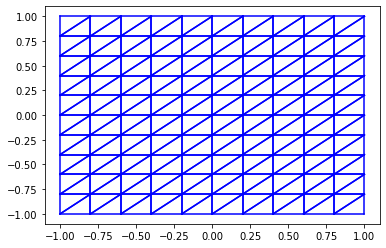

In [66]:
N=10
M=10
xmin=-1
xmax=1
ymin=-1
ymax=1

(nodos,elem,dirichlet)=gen_mesh_rectangle(N,M,xmin,xmax,ymin,ymax)


In [48]:
def f(x,y):
  return(x**2+y**2)

In [ ]:
x=[]
y=[]
z=[]
for nod in nodos:
  x.append(nod[0])
  y.append(nod[1])
  z.append(f(nod[0],nod[1]))

x=np.array([x])
y=np.array([y])
X,Y = np.meshgrid(x,y)
Z = np.sqrt(X**2+Y**2)

fig = plt.figure()
 
axes3d = Axes3D(fig)

axes3d.plot_surface(X,Y,Z)

#plt.show() 